In [1]:
import pandas as pd
df = pd.read_csv('Consumer_Complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,01/19/2017,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,NaN,Consent provided,Web,01/19/2017,Closed with explanation,Yes,No,2296496
2,04/06/2018,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Older American,Consent provided,Web,04/06/2018,Closed with explanation,Yes,NaN,2866101
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


In [2]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152267 entries, 0 to 1152266
Data columns (total 18 columns):
Date received                   1152267 non-null object
Product                         1152267 non-null object
Sub-product                     917100 non-null object
Issue                           1152267 non-null object
Sub-issue                       638186 non-null object
Consumer complaint narrative    335659 non-null object
Company public response         383414 non-null object
Company                         1152267 non-null object
State                           1136914 non-null object
ZIP code                        1062465 non-null object
Tags                            157795 non-null object
Consumer consent provided?      595567 non-null object
Submitted via                   1152267 non-null object
Date sent to company            1152267 non-null object
Company response to consumer    1152261 non-null object
Timely response?                1152267 non-null obje

In [4]:
# remove missing values from Consumer complaint narrative
from io import StringIO
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns = ['Product', 'Consumer_complaint_narrative']

In [5]:
# encode product as category id 
# create a lookup for product to category and category to product
df['category_id'] = pd.factorize(df['Product'])[0]
category_id_df = df[['Product', 'category_id'
                     ]].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

,Product,Consumer_complaint_narrative,category_id
1,Student loan,When my loan was switched over to Navient i wa...,0
2,Credit card or prepaid card,I tried to sign up for a spending monitoring p...,1
7,Mortgage,"My mortgage is with BB & T Bank, recently I ha...",2
13,Mortgage,The entire lending experience with Citizens Ba...,2
14,Credit reporting,My credit score has gone down XXXX points in t...,3


In [6]:
category_to_id

{'Student loan': 0,
 'Credit card or prepaid card': 1,
 'Mortgage': 2,
 'Credit reporting': 3,
 'Credit reporting, credit repair services, or other personal consumer reports': 4,
 'Debt collection': 5,
 'Vehicle loan or lease': 6,
 'Money transfer, virtual currency, or money service': 7,
 'Checking or savings account': 8,
 'Payday loan, title loan, or personal loan': 9,
 'Consumer Loan': 10,
 'Bank account or service': 11,
 'Credit card': 12,
 'Money transfers': 13,
 'Prepaid card': 14,
 'Payday loan': 15,
 'Other financial service': 16,
 'Virtual currency': 17}

In [7]:
id_to_category

{0: 'Student loan',
 1: 'Credit card or prepaid card',
 2: 'Mortgage',
 3: 'Credit reporting',
 4: 'Credit reporting, credit repair services, or other personal consumer reports',
 5: 'Debt collection',
 6: 'Vehicle loan or lease',
 7: 'Money transfer, virtual currency, or money service',
 8: 'Checking or savings account',
 9: 'Payday loan, title loan, or personal loan',
 10: 'Consumer Loan',
 11: 'Bank account or service',
 12: 'Credit card',
 13: 'Money transfers',
 14: 'Prepaid card',
 15: 'Payday loan',
 16: 'Other financial service',
 17: 'Virtual currency'}

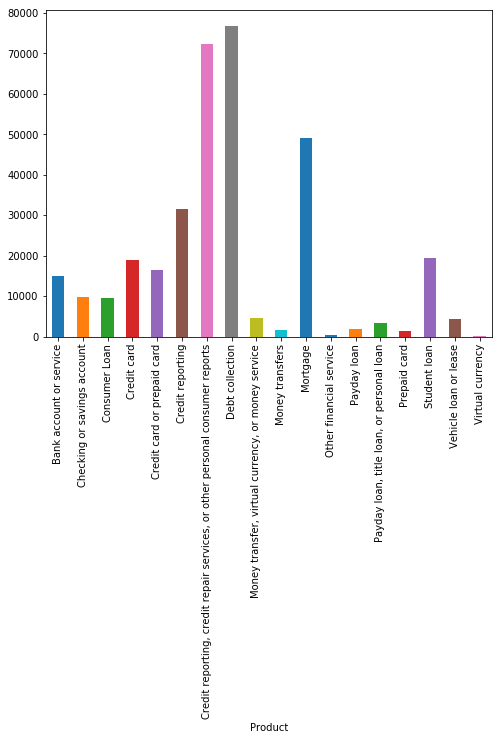

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [9]:
df.groupby('Product').Consumer_complaint_narrative.count().sort_values()

Product
Virtual currency                                                                   16
Other financial service                                                           292
Prepaid card                                                                     1450
Money transfers                                                                  1497
Payday loan                                                                      1747
Payday loan, title loan, or personal loan                                        3335
Vehicle loan or lease                                                            4380
Money transfer, virtual currency, or money service                               4468
Consumer Loan                                                                    9473
Checking or savings account                                                      9826
Bank account or service                                                         14885
Credit card or prepaid card                   

In [10]:
# Maximum complains are related to Mortgage, Credit reporting, credit repair services, or other personal consumer reports and Debt collection
# This dataset is biased. We have to consider this while modeling 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Consumer_complaint_narrative)
labels = df.category_id
features.shape

(335659, 655128)

In [12]:
features

<335659x655128 sparse matrix of type '<class 'numpy.float64'>'
	with 38855079 stored elements in Compressed Sparse Row format>

In [13]:
# print top 2 unigrams and bigrams
# sklearn.feature_selection.chi2(X, y)
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
# This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X
# in our case X is features and y is category id (target variable)
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    nl = chr(10)
    print(f"# '{Product}':")
    print(f"  . Most correlated unigrams:{nl}. {'{nl}. '.join(unigrams[-N:])}")
    print(f"  . Most correlated bigrams:{nl}. {'{nl}. '.join(bigrams[-N:])}")
    

# 'Bank account or service':
  . Most correlated unigrams:
. bank{nl}. overdraft
  . Most correlated bigrams:
. overdraft fees{nl}. checking account
# 'Checking or savings account':
  . Most correlated unigrams:
. overdraft{nl}. deposit
  . Most correlated bigrams:
. overdraft fees{nl}. checking account
# 'Consumer Loan':
  . Most correlated unigrams:
. vehicle{nl}. car
  . Most correlated bigrams:
. car loan{nl}. auto loan
# 'Credit card':
  . Most correlated unigrams:
. macy{nl}. card
  . Most correlated bigrams:
. american express{nl}. credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. express{nl}. card
  . Most correlated bigrams:
. american express{nl}. credit card
# 'Credit reporting':
  . Most correlated unigrams:
. equifax{nl}. experian
  . Most correlated bigrams:
. verify accounts{nl}. credit report
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. inquiries{nl}. equifax
  . Most correla

In [14]:
### Same process with NLTK

In [15]:
import pandas as pd
import re
import nltk
dataset = pd.read_csv('Consumer_Complaints.csv', encoding='ISO-8859-1');

In [16]:
dataset.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,01/19/2017,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,NaN,Consent provided,Web,01/19/2017,Closed with explanation,Yes,No,2296496
2,04/06/2018,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Older American,Consent provided,Web,04/06/2018,Closed with explanation,Yes,NaN,2866101
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


In [17]:
dataset['category_id'] = pd.factorize(dataset['Product'])[0]
category_id_dataset = dataset[['Product', 'category_id'
                     ]].drop_duplicates().sort_values('category_id')
category_to_id_dataset = dict(category_id_dataset.values)
id_dataset_to_category = dict(category_id_dataset[['category_id', 'Product']].values)
dataset.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,category_id
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217,0
1,01/19/2017,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,NaN,Consent provided,Web,01/19/2017,Closed with explanation,Yes,No,2296496,1
2,04/06/2018,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Older American,Consent provided,Web,04/06/2018,Closed with explanation,Yes,NaN,2866101,2
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638,3
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760,4


In [18]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt 

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

#spell correction
from autocorrect import spell


[nltk_data] Downloading package punkt to /home/kdeodhar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kdeodhar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
dataset.dropna(subset=["Consumer complaint narrative"], inplace = True)

In [20]:
# data = []
# for i in range(dataset.shape[0]):
#     sms = dataset.iloc[i, 5]
#     # remove non alphabatic characters
#     sms = re.sub('[^A-Za-z]', ' ', sms)
#     # make words lowercase, because Go and go will be considered as two words
#     sms = sms.lower()
#     # tokenising
#     tokenized_sms = wt(sms)
#     # remove stop words and stemming
#     sms_processed = []
#     for word in tokenized_sms:
#         if word not in set(stopwords.words('english')):
#             sms_processed.append(spell(stemmer.stem(word)))
#     sms_text = " ".join(sms_processed)
#     data.append(sms_text)

In [21]:
data = []
dataset["ccn2"] = dataset["Consumer complaint narrative"].apply(lambda x: re.sub('[^A-Za-z]', ' ', x)).str.lower().apply(lambda x: wt(x))

In [22]:
# dataset["ccn2"] = dataset.ccn2.str.lower()

In [23]:
# dataset["ccn3"] = dataset["ccn2"].apply(lambda x: wt(x))

In [24]:
dataset["ccn2"][:10]

1     [when, my, loan, was, switched, over, to, navi...
2     [i, tried, to, sign, up, for, a, spending, mon...
7     [my, mortgage, is, with, bb, t, bank, recently...
13    [the, entire, lending, experience, with, citiz...
14    [my, credit, score, has, gone, down, xxxx, poi...
16    [i, few, months, back, i, contacted, xxxx, in,...
25    [i, m, a, victim, of, fraud, and, i, have, a, ...
28    [i, have, been, disputing, a, bankruptcy, on, ...
42    [today, i, received, a, phone, call, from, a, ...
53    [i, have, gotten, calls, from, ar, resources, ...
Name: ccn2, dtype: object

In [25]:
# import itertools
# sms_processed = list(itertools.chain.from_iterable(dataset["ccn2"]))
# sms_processed2 = list(set(sms_processed).difference(set(stopwords.words('english'))))

In [26]:
# dataset["ccn3"] = dataset["ccn2"].apply(lambda x: list(set(x).difference(set(stopwords.words('english')))))

In [27]:
# dataset["ccn3"][:10]

In [28]:
# dataset["ccn4"] = dataset["ccn3"].apply(lambda x: [spell(stemmer.stem(item)) for item in x])

In [29]:
# dataset["ccn4"][:10]

In [30]:
dataset["ccn5"] = dataset["ccn2"].apply(lambda x: " ".join(x)) 
data = dataset["ccn5"].tolist()

In [31]:
dataset["ccn5"]

1          when my loan was switched over to navient i wa...
2          i tried to sign up for a spending monitoring p...
7          my mortgage is with bb t bank recently i have ...
13         the entire lending experience with citizens ba...
14         my credit score has gone down xxxx points in t...
16         i few months back i contacted xxxx in regards ...
25         i m a victim of fraud and i have a file with t...
28         i have been disputing a bankruptcy on my credi...
42         today i received a phone call from a number li...
53         i have gotten calls from ar resources looking ...
55         i apparently have an outstanding debt with xxx...
71         this is my second attempt to have the problem ...
74         this account is old and should have been remov...
76         on xx xx i attempted to dispute an account fro...
78         alleged company use scare tactics to threaten ...
83         on the credit report equifax there is a name l...
94         i filed a com

In [32]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(min_df=5, encoding='latin-1', ngram_range=(1, 2), stop_words='english')
X = matrix.fit_transform(data)
y = dataset["category_id"]

In [33]:
category_to_id_dataset.items()

dict_items([('Mortgage', 0), ('Student loan', 1), ('Credit card or prepaid card', 2), ('Credit card', 3), ('Debt collection', 4), ('Credit reporting', 5), ('Credit reporting, credit repair services, or other personal consumer reports', 6), ('Bank account or service', 7), ('Consumer Loan', 8), ('Money transfers', 9), ('Vehicle loan or lease', 10), ('Money transfer, virtual currency, or money service', 11), ('Checking or savings account', 12), ('Payday loan', 13), ('Payday loan, title loan, or personal loan', 14), ('Other financial service', 15), ('Prepaid card', 16), ('Virtual currency', 17)])

In [34]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id_dataset.items()):
    features_chi2 = chi2(X, y == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(matrix.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    nl = '\n'
    nl = chr(10)
    print(f"# '{Product}':")
    print(f"  . Most correlated unigrams:{nl}. {'{nl}. '.join(unigrams[-N:])}")
    print(f"  . Most correlated bigrams:{nl}. {'{nl}. '.join(bigrams[-N:])}")


# 'Bank account or service':
  . Most correlated unigrams:
. overdraft{nl}. bank
  . Most correlated bigrams:
. overdraft fees{nl}. checking account
# 'Checking or savings account':
  . Most correlated unigrams:
. account{nl}. bank
  . Most correlated bigrams:
. debit card{nl}. checking account
# 'Consumer Loan':
  . Most correlated unigrams:
. vehicle{nl}. car
  . Most correlated bigrams:
. chrysler capital{nl}. auto loan
# 'Credit card':
  . Most correlated unigrams:
. macy{nl}. card
  . Most correlated bigrams:
. american express{nl}. credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. express{nl}. card
  . Most correlated bigrams:
. american express{nl}. credit card
# 'Credit reporting':
  . Most correlated unigrams:
. experian{nl}. equifax
  . Most correlated bigrams:
. xx xx{nl}. credit report
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. credit{nl}. report
  . Most correlated bigrams:
. 